In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df = pd.read_csv("C:/Users/HP/Documents/cali_sales_training_dataset.csv")

In [4]:
df.head()

,department_lvl1,department_lvl2,department_lvl3,product_code,product_name,cost,sold_qty,sold_cost,actual_gp_percent,exclusive,tax,inclusive,theoretical_gp_percent,product_cost_value,percent_of_turnover
0,Beer,Lager,Premium,5153,Brand A 330ml,48.07,14.0,672.98,61.28,1008.90,151.33,1160.23,93.96,528.77,5.11
1,Beer,Lager,Standard,5154,Brand B 330ml,114.33,18.0,2057.94,44.58,2900.42,435.06,3335.48,88.87,1257.63,14.70
2,Beer,Cider,Dry,5155,Cider Can,89.18,11.0,980.98,90.43,1622.58,243.39,1865.97,69.44,980.98,8.22
3,Wine,Red,Merlot,6101,House Merlot,NaN,19.0,NaN,64.01,NaN,NaN,NaN,70.24,NaN,NaN
4,Wine,White,Chardonnay,6102,House Chardonnay,22.94,2.0,45.88,46.64,72.31,10.85,83.16,61.62,68.82,0.37


In [5]:
#checking data frame info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   department_lvl1         24 non-null     object 
 1   department_lvl2         24 non-null     object 
 2   department_lvl3         23 non-null     object 
 3   product_code            24 non-null     int64  
 4   product_name            23 non-null     object 
 5   cost                    23 non-null     float64
 6   sold_qty                23 non-null     float64
 7   sold_cost               22 non-null     float64
 8   actual_gp_percent       24 non-null     float64
 9   exclusive               22 non-null     float64
 10  tax                     22 non-null     float64
 11  inclusive               22 non-null     float64
 12  theoretical_gp_percent  24 non-null     float64
 13  product_cost_value      23 non-null     float64
 14  percent_of_turnover     22 non-null     floa

In [6]:
#checking data for numeric columns.
df.describe()

,product_code,cost,sold_qty,sold_cost,actual_gp_percent,exclusive,tax,inclusive,theoretical_gp_percent,product_cost_value,percent_of_turnover
count,24.000000,23.000000,23.000000,22.000000,24.000000,22.000000,22.000000,22.000000,24.000000,23.000000,22.000000
mean,5895.291667,54.826087,10.652174,528.518182,71.747917,896.972273,134.545000,1031.517273,79.707500,451.826522,4.544091
std,770.471706,34.025464,5.989451,476.818761,32.007534,759.979765,113.996274,873.976039,11.282978,356.054062,3.851464
min,5153.000000,7.370000,1.000000,26.090000,-20.000000,38.020000,5.700000,43.720000,61.620000,0.000000,0.190000
25%,5158.750000,26.000000,6.000000,208.020000,55.515000,326.087500,48.910000,374.997500,69.110000,188.960000,1.652500
50%,6101.500000,47.130000,11.000000,461.765000,72.425000,784.220000,117.630000,901.850000,82.060000,319.920000,3.970000
75%,6330.500000,80.895000,15.500000,657.907500,89.950000,1189.090000,178.365000,1367.455000,87.972500,660.335000,6.027500
max,7006.000000,116.540000,19.000000,2057.940000,150.000000,2900.420000,435.060000,3335.480000,97.710000,1257.630000,14.700000


In [7]:
#checking for missing values.
df.isnull().sum()

department_lvl1           0
department_lvl2           0
department_lvl3           1
product_code              0
product_name              1
cost                      1
sold_qty                  1
sold_cost                 2
actual_gp_percent         0
exclusive                 2
tax                       2
inclusive                 2
theoretical_gp_percent    0
product_cost_value        1
percent_of_turnover       2
dtype: int64

In [8]:
#checking data shape (rows, columns).
df.shape

(24, 15)

In [9]:
#checking column names.
df.columns

Index(['department_lvl1', 'department_lvl2', 'department_lvl3', 'product_code',
       'product_name', 'cost', 'sold_qty', 'sold_cost', 'actual_gp_percent',
       'exclusive', 'tax', 'inclusive', 'theoretical_gp_percent',
       'product_cost_value', 'percent_of_turnover'],
      dtype='object')

In [10]:
print(df[['tax', 'inclusive']].head())

      tax  inclusive
0  151.33    1160.23
1  435.06    3335.48
2  243.39    1865.97
3     NaN        NaN
4   10.85      83.16


In [11]:
# Removing any row that contains at least one missing value.
df_clean = df.dropna()

In [12]:
# Verifying the new shape. 
print(df_clean.shape)

(20, 15)


In [15]:
# Resetting the index so it is sequential again (0, 1, 2...
df_clean = df_clean.reset_index(drop=True)

In [16]:
#Viewing the first 5 rows to confirm changes.
df_clean.head(5)

,department_lvl1,department_lvl2,department_lvl3,product_code,product_name,cost,sold_qty,sold_cost,actual_gp_percent,exclusive,tax,inclusive,theoretical_gp_percent,product_cost_value,percent_of_turnover
0,Beer,Lager,Premium,5153,Brand A 330ml,48.07,14.0,672.98,61.28,1008.90,151.33,1160.23,93.96,528.77,5.11
1,Beer,Lager,Standard,5154,Brand B 330ml,114.33,18.0,2057.94,44.58,2900.42,435.06,3335.48,88.87,1257.63,14.70
2,Beer,Cider,Dry,5155,Cider Can,89.18,11.0,980.98,90.43,1622.58,243.39,1865.97,69.44,980.98,8.22
3,Wine,White,Chardonnay,6102,House Chardonnay,22.94,2.0,45.88,46.64,72.31,10.85,83.16,61.62,68.82,0.37
4,Spirits,Vodka,Premium,7001,Premium Vodka 750ml,22.94,4.0,91.76,-20.00,129.24,19.39,148.63,88.43,298.22,0.65


In [17]:
#see mean, max, and min for numerical columns.
df_clean.describe()

,product_code,cost,sold_qty,sold_cost,actual_gp_percent,exclusive,tax,inclusive,theoretical_gp_percent,product_cost_value,percent_of_turnover
count,20.000000,20.000000,20.00000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,5810.900000,50.049500,10.35000,499.494500,71.563000,829.54700,124.431500,953.978500,79.670000,401.541000,4.202500
std,742.443399,32.789729,6.02866,464.956973,34.488171,696.01612,104.401948,800.418067,12.030633,347.548712,3.527613
min,5153.000000,7.370000,1.00000,26.090000,-20.000000,38.02000,5.700000,43.720000,61.620000,0.000000,0.190000
25%,5157.750000,25.167500,5.50000,186.782500,53.295000,300.82500,45.122500,345.947500,68.107500,137.445000,1.525000
50%,5632.500000,39.295000,11.00000,461.765000,73.655000,784.22000,117.630000,901.850000,82.060000,308.360000,3.970000
75%,6106.250000,74.437500,14.75000,627.762500,89.950000,1137.31000,170.595000,1307.905000,88.540000,559.952500,5.762500
max,7006.000000,116.540000,19.00000,2057.940000,150.000000,2900.42000,435.060000,3335.480000,97.710000,1257.630000,14.700000


In [18]:
# Looking for rows with unusual profit margins
outliers = df_clean[(df_clean['actual_gp_percent'] < 0) | (df_clean['actual_gp_percent'] > 100)]
outliers

,department_lvl1,department_lvl2,department_lvl3,product_code,product_name,cost,sold_qty,sold_cost,actual_gp_percent,exclusive,tax,inclusive,theoretical_gp_percent,product_cost_value,percent_of_turnover
4,Spirits,Vodka,Premium,7001,Premium Vodka 750ml,22.94,4.0,91.76,-20.00,129.24,19.39,148.63,88.43,298.22,0.65
8,Beer,Lager,Standard,5157,Brand D 330ml,7.37,17.0,125.29,150.00,245.04,36.76,281.80,79.01,81.07,1.24
12,Beer,Lager,Standard,5160,Brand F 330ml,26.09,1.0,26.09,106.89,38.02,5.70,43.72,81.59,0.00,0.19
16,Spirits,Whisky,12yr,7006,Whisky 18yr,75.36,7.0,527.52,107.22,825.48,123.82,949.30,95.22,226.08,4.18


In [19]:
# Creating a new dataframe excluding GP % less than 0 or greater than 100.
df_final = df_clean[(df_clean['actual_gp_percent'] >= 0) & (df_clean['actual_gp_percent'] <= 100)].copy()

In [20]:
# Resetting the index one last time for a clean sequence.
df_final = df_final.reset_index(drop=True)

In [21]:
# Checking the new shape and summary.
print(f"Remaining rows: {df_final.shape[0]}")
df_final['actual_gp_percent'].describe()

Remaining rows: 16


count    16.000000
mean     67.946875
std      18.858171
min      32.510000
25%      53.295000
50%      68.825000
75%      80.965000
max      97.560000
Name: actual_gp_percent, dtype: float64

In [25]:
#Checking the exact names of the columns in your clean data.
print(df_final.columns.tolist())

['department_lvl1', 'department_lvl2', 'department_lvl3', 'product_code', 'product_name', 'cost', 'sold_qty', 'sold_cost', 'actual_gp_percent', 'exclusive', 'tax', 'inclusive', 'theoretical_gp_percent', 'product_cost_value', 'percent_of_turnover']


In [26]:
df_final.columns = df_final.columns.str.strip()

In [27]:
print(df_final.columns.tolist())

['department_lvl1', 'department_lvl2', 'department_lvl3', 'product_code', 'product_name', 'cost', 'sold_qty', 'sold_cost', 'actual_gp_percent', 'exclusive', 'tax', 'inclusive', 'theoretical_gp_percent', 'product_cost_value', 'percent_of_turnover']


In [33]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, 0 to 19
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   department_lvl1         16 non-null     object 
 1   department_lvl2         16 non-null     object 
 2   department_lvl3         16 non-null     object 
 3   product_code            16 non-null     int64  
 4   product_name            16 non-null     object 
 5   cost                    16 non-null     float64
 6   sold_qty                16 non-null     float64
 7   sold_cost               16 non-null     float64
 8   actual_gp_percent       16 non-null     float64
 9   exclusive               16 non-null     float64
 10  tax                     16 non-null     float64
 11  inclusive               16 non-null     float64
 12  theoretical_gp_percent  16 non-null     float64
 13  product_cost_value      16 non-null     float64
 14  percent_of_turnover     16 non-null     float64
d

In [35]:
#Force-rename the first column to exactly 'department_lv1' by position
cols = list(df_final.columns)
cols[0] = 'department_lv1'
df_final.columns = cols

#Re-run the groupby now that the name is guaranteed
dept_analysis = df_final.groupby('department_lv1').agg({
    'inclusive': 'sum',
    'actual_gp_percent': 'mean',
    'sold_qty': 'sum'
}).rename(columns={
    'inclusive': 'Total Revenue', 
    'actual_gp_percent': 'Avg Margin %', 
    'sold_qty': 'Total Qty'
})

dept_analysis

,Total Revenue,Avg Margin %,Total Qty
department_lv1,,,
Beer,10743.32,69.297500,89.0
Spirits,2262.54,61.150000,32.0
Wine,4650.26,68.411667,57.0


In [36]:
#Calculating the percentage of total revenue each department represents.
total_business_revenue = dept_analysis['Total Revenue'].sum()
dept_analysis['Revenue Share %'] = (dept_analysis['Total Revenue'] / total_business_revenue) * 100

#Displaying the updated table.
dept_analysis[['Total Revenue', 'Revenue Share %', 'Avg Margin %']].sort_values(by='Revenue Share %', ascending=False)

,Total Revenue,Revenue Share %,Avg Margin %
department_lv1,,,
Beer,10743.32,60.84757,69.297500
Wine,4650.26,26.33795,68.411667
Spirits,2262.54,12.81448,61.150000


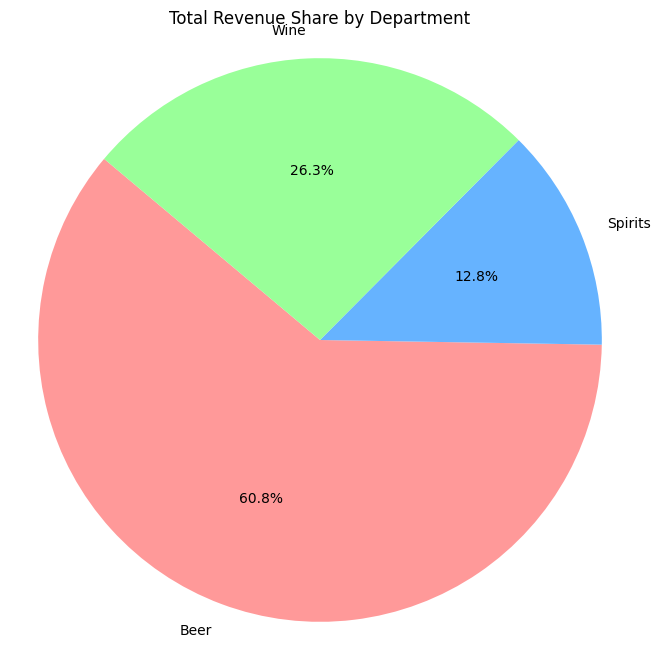

In [37]:
import matplotlib.pyplot as plt

#Creating the pie chart.
plt.figure(figsize=(8, 8))
plt.pie(dept_analysis['Revenue Share %'], 
        labels=dept_analysis.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=['#ff9999','#66b3ff','#99ff99'])

plt.title('Total Revenue Share by Department')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [38]:
#Filtering for just the Beer department.
beer_df = df_final[df_final['department_lv1'] == 'Beer'].copy()

#Sorting by inclusive revenue to see top sellers.
beer_top_sellers = beer_df[['product_name', 'sold_qty', 'inclusive', 'actual_gp_percent']].sort_values(by='inclusive', ascending=False)

# Calculating cumulative percentage to find the top 80% of revenue.
beer_top_sellers['cumulative_revenue'] = beer_top_sellers['inclusive'].cumsum()
beer_top_sellers['cumulative_percent'] = (beer_top_sellers['cumulative_revenue'] / beer_top_sellers['inclusive'].sum()) * 100

beer_top_sellers

,product_name,sold_qty,inclusive,actual_gp_percent,cumulative_revenue,cumulative_percent
1,Brand B 330ml,18.0,3335.48,44.58,3335.48,31.047013
2,Cider Can,11.0,1865.97,90.43,5201.45,48.415667
19,Brand I 330ml,13.0,1397.23,53.70,6598.68,61.421237
6,Brand C 330ml,8.0,1278.13,65.98,7876.81,73.318211
0,Brand A 330ml,14.0,1160.23,61.28,9037.04,84.117759
9,Brand E 330ml,3.0,719.96,88.18,9757.00,90.819225
17,Brand H 330ml,14.0,588.32,78.56,10345.32,96.295372
11,Cider Bottle,8.0,398.00,71.67,10743.32,100.000000


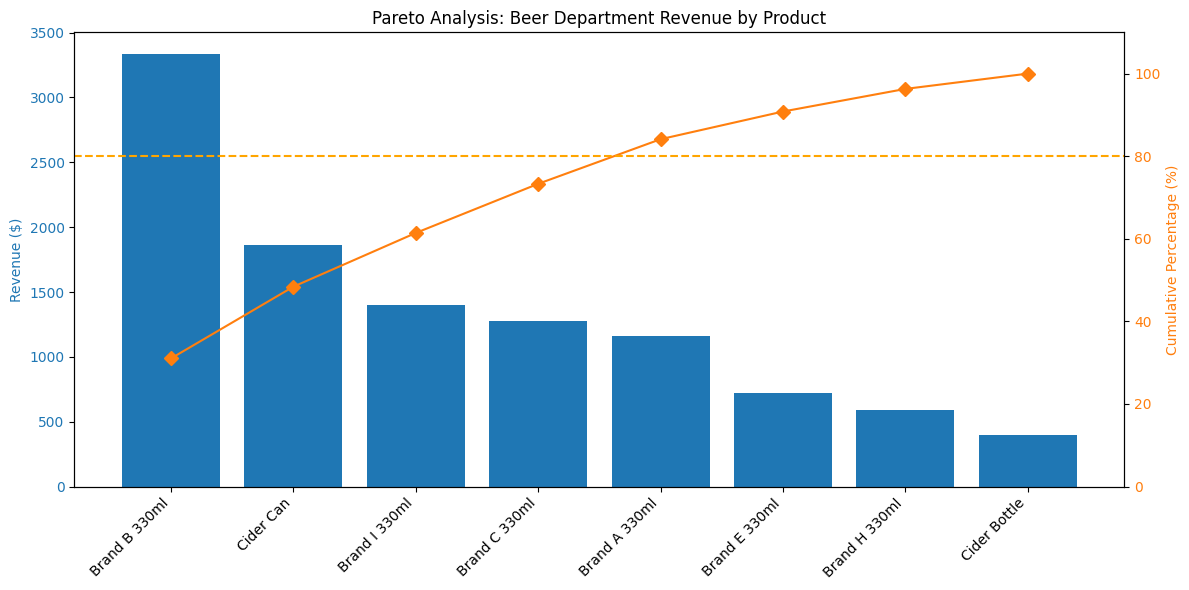

In [39]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12, 6))

#Bar chart for individual revenue
ax1.bar(beer_top_sellers['product_name'], beer_top_sellers['inclusive'], color='C0')
ax1.set_ylabel('Revenue ($)', color='C0')
ax1.tick_params(axis='y', labelcolor='C0')
plt.xticks(rotation=45, ha='right')

#Line chart for cumulative percentage
ax2 = ax1.twinx()
ax2.plot(beer_top_sellers['product_name'], beer_top_sellers['cumulative_percent'], color='C1', marker='D', ms=7)
ax2.axhline(80, color='orange', linestyle='--') # 80% threshold line
ax2.set_ylabel('Cumulative Percentage (%)', color='C1')
ax2.set_ylim(0, 110)
ax2.tick_params(axis='y', labelcolor='C1')

plt.title('Pareto Analysis: Beer Department Revenue by Product')
plt.tight_layout()
plt.show()

In [40]:
# Filtering for just the Spirits department
spirits_df = df_final[df_final['department_lv1'] == 'Spirits'].copy()

# Sorting by actual_gp_percent to identify the least profitable items
spirits_analysis = spirits_df[['product_name', 'inclusive', 'actual_gp_percent', 'sold_qty']].sort_values(by='actual_gp_percent')

spirits_analysis

,product_name,inclusive,actual_gp_percent,sold_qty
5,Whisky 12yr,367.33,32.51,18.0
14,Vodka Standard,1895.21,89.79,14.0


In [41]:
# Calculating Average Price Per Unit for each department
dept_analysis['Avg Price Per Unit'] = dept_analysis['Total Revenue'] / dept_analysis['Total Qty']

# Displaying the comparison between Beer and Spirits
dept_analysis[['Total Revenue', 'Total Qty', 'Avg Price Per Unit', 'Avg Margin %']]

,Total Revenue,Total Qty,Avg Price Per Unit,Avg Margin %
department_lv1,,,,
Beer,10743.32,89.0,120.711461,69.297500
Spirits,2262.54,32.0,70.704375,61.150000
Wine,4650.26,57.0,81.583509,68.411667


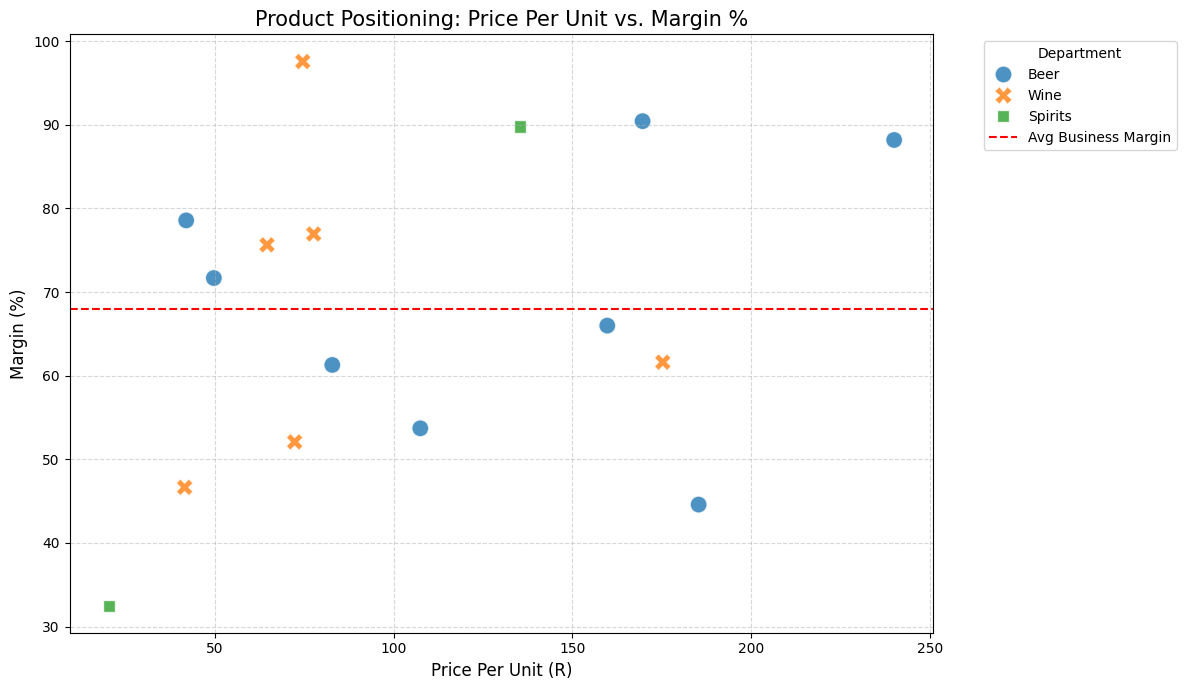

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculating price per unit for each individual product.
df_final['price_per_unit'] = df_final['inclusive'] / df_final['sold_qty']

# Creating the scatter plot
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=df_final, 
    x='price_per_unit', 
    y='actual_gp_percent', 
    hue='department_lv1', 
    s=150, 
    style='department_lv1',
    alpha=0.8
)

# Formatting
plt.title('Product Positioning: Price Per Unit vs. Margin %', fontsize=15)
plt.xlabel('Price Per Unit (R)', fontsize=12)
plt.ylabel('Margin (%)', fontsize=12)
plt.axhline(df_final['actual_gp_percent'].mean(), color='red', linestyle='--', label='Avg Business Margin')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [44]:
# Calculating absolute profit value in Rands.
df_final['profit_val'] = df_final['inclusive'] - df_final['sold_cost']

# Selecting and sort the top 5 products by absolute profit.
top_5_profitable = df_final[['product_name', 'department_lv1', 'inclusive', 'profit_val', 'actual_gp_percent']] \
                    .sort_values(by='profit_val', ascending=False).head(5)

# Formatting for a professional display.
top_5_profitable.style.format({
    'inclusive': 'R{:,.2f}',
    'profit_val': 'R{:,.2f}',
    'actual_gp_percent': '{:.2f}%'
}).hide(axis='index')

product_name,department_lv1,inclusive,profit_val,actual_gp_percent
Brand B 330ml,Beer,"R3,335.48","R1,277.54",44.58%
Vodka Standard,Spirits,"R1,895.21",R980.31,89.79%
Cider Can,Beer,"R1,865.97",R884.99,90.43%
Brand I 330ml,Beer,"R1,397.23",R784.54,53.70%
Brand C 330ml,Beer,"R1,278.13",R685.09,65.98%


# Retail Performance Report
1. Core Business Composition
The business is heavily concentrated in one category, which drives both volume and cash flow.

The main revenue earner is (Beer): This department dominates your shop, contributing R10,743.32 (60.85%) of total revenue.

The second best earner (Wine): Wine accounts for R4,650.26 (26.34%) of revenue with a very strong profit margin of 68.41%.

The Underperformer (Spirits): This category has the lowest revenue share (12.81%) and the lowest average margin (61.15%).

2. Profitability & Pricing Insights
Our "Deep Dive" and "Scatter Plot" analysis revealed a surprising pricing dynamic.

Average Price Anomaly: Spirits are priced lower on average (~R70.70) than Beer (~R120.71). Usually, spirits are premium-priced; this suggests your current spirit inventory consists of low-end "commodity" items.

High-Volume/Low-Margin Risk: Your top revenue generator, Brand B 330ml, has a margin of only 44.58%. Because it accounts for 31% of your beer revenue, any cost increase from the supplier on this specific item will hit your total business profit hard.

The "Gold Mine" Product: Cider Can is a standout performer with a 90.43% profit margin, contributing nearly R1,900 in revenue.

3. Strategic Recommendations
Based on the data, here are three immediate actions for your shop:

Protect the Beer Volume: Since Beer is 60.8% of your business, ensure your top 4 brands (Brand B, Cider Can, Brand I, Brand C) never go out of stock, as they drive 73% of that department's success.

Reposition Spirits: Move away from the low-margin spirits that are currently dragging your average down to 61.15%. Consider introducing more premium bottles that can reach the 68-70% margin range seen in Beer and Wine.

Capitalize on Ciders: Since Cider Can has a massive 90% margin, consider a "buy 2" promotion or better shelf placement to increase its volume, as it is significantly more profitable per unit than Brand B.